In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../datasets/fashion-mnist/fashionmnist-train/fashion-mnist_train.csv')

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#y=data['label']

In [5]:
x_=np.array(data)

In [6]:
y_train=x_[:,0]

In [7]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [10]:
Y=np_utils.to_categorical(y_train)

In [11]:
X=x_[:,1:]

In [19]:
X=X.reshape((-1,28,28,1))

In [20]:
print(X.shape,Y.shape)

(60000, 28, 28, 1) (60000, 10)


In [21]:
test=(X[4]/255).reshape((28,28))

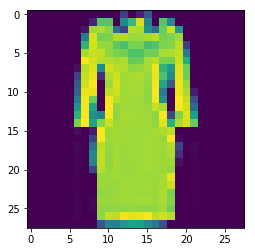

In [22]:
plt.imshow(test)

# CNN Model

In [23]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

W0317 18:42:52.099394 23000 deprecation_wrapper.py:119] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0317 18:42:52.822335 23000 deprecation_wrapper.py:119] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0317 18:42:52.888159 23000 deprecation.py:506] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0317 18:42:53.020856 23000 deprec

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0317 18:47:00.027019 23000 deprecation_wrapper.py:119] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0317 18:47:00.074958 23000 deprecation_wrapper.py:119] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.33, random_state=42)

In [29]:
his=model.fit(X_train,y_train,epochs=20,shuffle=True,batch_size=256)

W0317 18:53:23.357943 23000 deprecation.py:323] From C:\Users\sayoni ghosh\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
40200/40200 [==============================] - 157s 4ms/step - loss: 2.2170 - acc: 0.2586
Epoch 2/20
40200/40200 [==============================] - 151s 4ms/step - loss: 1.3073 - acc: 0.5487
Epoch 3/20
40200/40200 [==============================] - 152s 4ms/step - loss: 0.9565 - acc: 0.6795
Epoch 4/20
40200/40200 [==============================] - 155s 4ms/step - loss: 0.6137 - acc: 0.7852
Epoch 5/20
40200/40200 [==============================] - 177s 4ms/step - loss: 0.4732 - acc: 0.8329
Epoch 6/20
40200/40200 [==============================] - 168s 4ms/step - loss: 0.4098 - acc: 0.8532
Epoch 7/20
40200/40200 [==============================] - 1483s 37ms/step - loss: 0.3627 - acc: 0.8710
Epoch 8/20
40200/40200 [==============================] - 149s 4ms/step - loss: 0.3438 - acc: 0.8768
Epoch 9/20
40200/40200 [==============================] - 154s 4ms/step - loss: 0.3189 - acc: 0.8857
Epoch 10/20
40200/40200 [==============================] - 151s 4ms/step - loss: 0.2910 -

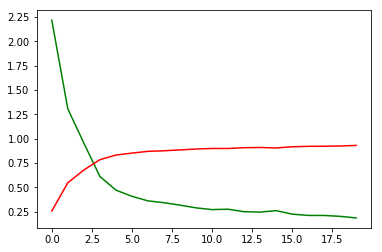

In [31]:
plt.figure(0)
plt.plot(his.history['loss'],'g')
plt.plot(his.history['acc'],'r')

In [33]:
model.evaluate(X_test,y_test)

19800/19800 [==============================] - 18s 892us/step


[0.3228610322210524, 0.8878787879028706]